# **Demand Forecasting and Inventory Optimization for Flavi Dairy Solutions**

**This project aims to predict future demand for dairy products using historical sales data. Accurate demand forecasting helps in minimizing wastage and improving inventory planning.**

**Load Dataset**

In [20]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/tejash2005/dairy-demand-forecasting/refs/heads/main/dairy_dataset.csv")


**Data Preprocessing**

In [21]:
df.shape


(4325, 23)

In [22]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

df['Date'] = pd.to_datetime(df['Date'])
df['Production Date'] = pd.to_datetime(df['Production Date'])
df['Expiration Date'] = pd.to_datetime(df['Expiration Date'])

df['Price per Unit'] = pd.to_numeric(df['Price per Unit'], errors='coerce')
df['Quantity (liters/kg)'] = pd.to_numeric(df['Quantity (liters/kg)'], errors='coerce')
df['Quantity Sold (liters/kg)'] = pd.to_numeric(df['Quantity Sold (liters/kg)'], errors='coerce')
df['Price per Unit (sold)'] = pd.to_numeric(df['Price per Unit (sold)'], errors='coerce')
df['Approx. Total Revenue(INR)'] = pd.to_numeric(df['Approx. Total Revenue(INR)'], errors='coerce')
df['Quantity in Stock (liters/kg)'] = pd.to_numeric(df['Quantity in Stock (liters/kg)'], errors='coerce')
df['Minimum Stock Threshold (liters/kg)'] = pd.to_numeric(df['Minimum Stock Threshold (liters/kg)'], errors='coerce')
df['Reorder Quantity (liters/kg)'] = pd.to_numeric(df['Reorder Quantity (liters/kg)'], errors='coerce')

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

print("after preprocessing:",df.shape)
print("data types:",df.dtypes)
print("sample data:",df.head(5))

after preprocessing: (4325, 23)
data types: Location                                       object
Total Land Area (acres)                       float64
Number of Cows                                  int64
Farm Size                                      object
Date                                   datetime64[ns]
Product ID                                      int64
Product Name                                   object
Brand                                          object
Quantity (liters/kg)                          float64
Price per Unit                                float64
Total Value                                   float64
Shelf Life (days)                               int64
Storage Condition                              object
Production Date                        datetime64[ns]
Expiration Date                        datetime64[ns]
Quantity Sold (liters/kg)                       int64
Price per Unit (sold)                         float64
Approx. Total Revenue(INR)            

**Exploratory Data Analysis (EDA)**

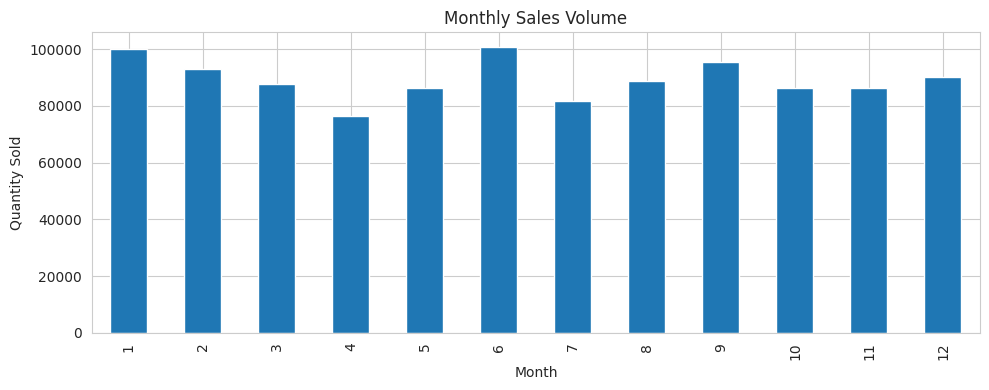

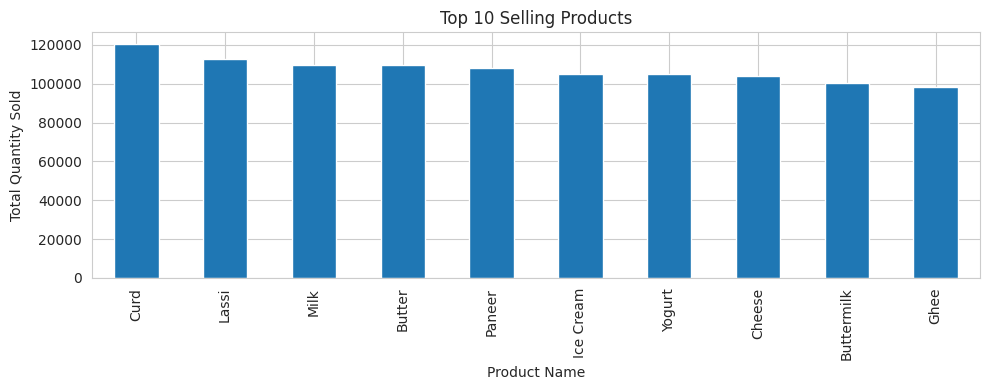

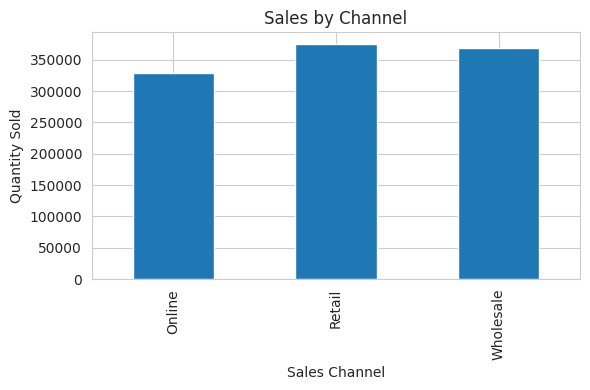

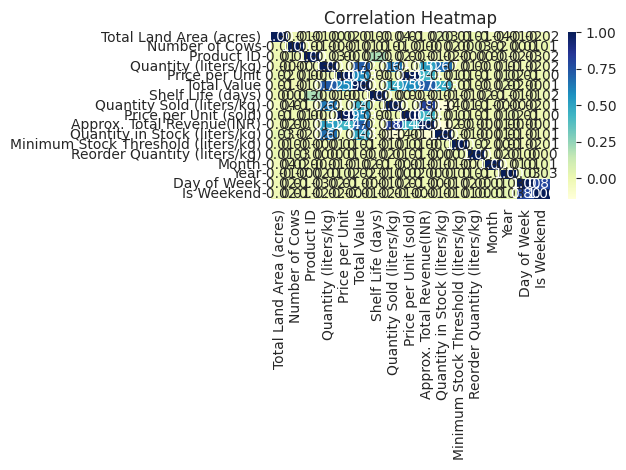

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df['Day of Week'] = df['Date'].dt.dayofweek
df['Is Weekend'] = df['Day of Week'].apply(lambda x: 1 if x >= 5 else 0)

df.groupby('Month')['Quantity Sold (liters/kg)'].sum().plot(kind='bar', figsize=(10, 4))
plt.title('Monthly Sales Volume')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.tight_layout()
plt.show()

df.groupby('Product Name')['Quantity Sold (liters/kg)'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 4))
plt.title('Top 10 Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.tight_layout()
plt.show()

df.groupby('Sales Channel')['Quantity Sold (liters/kg)'].sum().plot(kind='bar', figsize=(6, 4))
plt.title('Sales by Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Quantity Sold')
plt.tight_layout()
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


**Advance feature engineering**

In [24]:
import pandas as pd

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Week'] = df['Date'].dt.isocalendar().week
df['Day'] = df['Date'].dt.day
df['Day of Week'] = df['Date'].dt.dayofweek
df['Is Weekend'] = df['Day of Week'].apply(lambda x: 1 if x >= 5 else 0)

df['Days to Expiry'] = (df['Expiration Date'] - df['Production Date']).dt.days
df['Stock Turnover Rate'] = df['Quantity Sold (liters/kg)'] / df['Quantity in Stock (liters/kg)']
df['Revenue per Unit'] = df['Approx. Total Revenue(INR)'] / df['Quantity Sold (liters/kg)']
df['Profit Margin per Unit'] = df['Price per Unit (sold)'] - df['Price per Unit']

df.replace([float('inf'), -float('inf')], 0, inplace=True)
df.fillna(0, inplace=True)

print(df[['Month', 'Year', 'Is Weekend', 'Days to Expiry', 'Stock Turnover Rate', 'Revenue per Unit', 'Profit Margin per Unit']].head())


   Month  Year  Is Weekend  Days to Expiry  Stock Turnover Rate  \
0      2  2022           0              25             0.032558   
1     12  2021           0              22             4.325581   
2      2  2022           0              30             1.036437   
3      6  2019           1              72             2.707207   
4     12  2020           0              11            72.500000   

   Revenue per Unit  Profit Margin per Unit  
0             82.24                   -3.48  
1             39.24                   -3.37  
2             33.81                   -2.69  
3             28.92                    2.40  
4             83.07                   -0.78  




# Model Building



**Demand Forecasting and Capacity Utilization Analysis using Prophet**

*This section uses the Facebook Prophet model to forecast product-wise demand for the next 7 days and evaluates daily plant capacity utilization. It helps identify whether the plant is underutilized, overloaded, or operating optimally based on forecasted demand.*






DEBUG:cmdstanpy:input tempfile: /tmp/tmp2l6cj4mr/_17zshy3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2l6cj4mr/z_fcg5l8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39043', 'data', 'file=/tmp/tmp2l6cj4mr/_17zshy3.json', 'init=/tmp/tmp2l6cj4mr/z_fcg5l8.json', 'output', 'file=/tmp/tmp2l6cj4mr/prophet_modeldanrshos/prophet_model-20250715052625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:26:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:26:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2l6cj4mr/1pd3oolt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2l6cj4mr/_a8teztw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

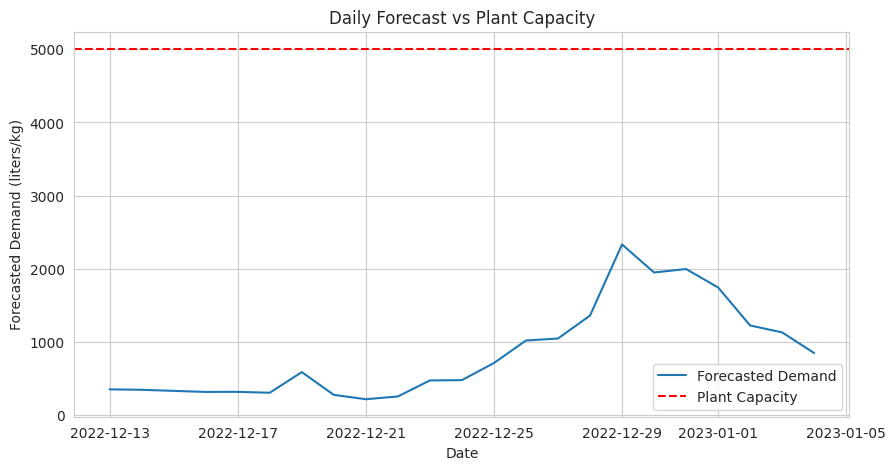

Utilization Status
Underutilized    23
Name: count, dtype: int64


In [25]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

capacity_per_day = 5000
forecast_days = 7

df_prophet = df[['Date', 'Quantity Sold (liters/kg)', 'Product Name']].rename(columns={'Date': 'ds', 'Quantity Sold (liters/kg)': 'y'})

results = []

for product in df_prophet['Product Name'].unique():
    temp = df_prophet[df_prophet['Product Name'] == product][['ds', 'y']]
    if len(temp) >= 30:
        model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
        model.fit(temp)
        future = model.make_future_dataframe(periods=forecast_days)
        forecast = model.predict(future)
        last = forecast[['ds', 'yhat']].tail(forecast_days).copy()
        last['Product Name'] = product
        results.append(last)

forecast_df = pd.concat(results)

daily_forecast = forecast_df.groupby('ds')['yhat'].sum().reset_index()
daily_forecast['Utilization %'] = (daily_forecast['yhat'] / capacity_per_day) * 100
daily_forecast['Utilization Status'] = daily_forecast['Utilization %'].apply(lambda x: 'Underutilized' if x < 90 else ('Overloaded' if x > 110 else 'Optimal'))

plt.figure(figsize=(10, 5))
plt.plot(daily_forecast['ds'], daily_forecast['yhat'], label='Forecasted Demand')
plt.axhline(y=capacity_per_day, color='r', linestyle='--', label='Plant Capacity')
plt.title('Daily Forecast vs Plant Capacity')
plt.xlabel('Date')
plt.ylabel('Forecasted Demand (liters/kg)')
plt.legend()
plt.grid(True)
plt.show()

print(daily_forecast['Utilization Status'].value_counts())

daily_forecast.to_csv('demand_forecast_with_utilization.csv', index=False)


**Trend in Capacity Utilization Over Time**

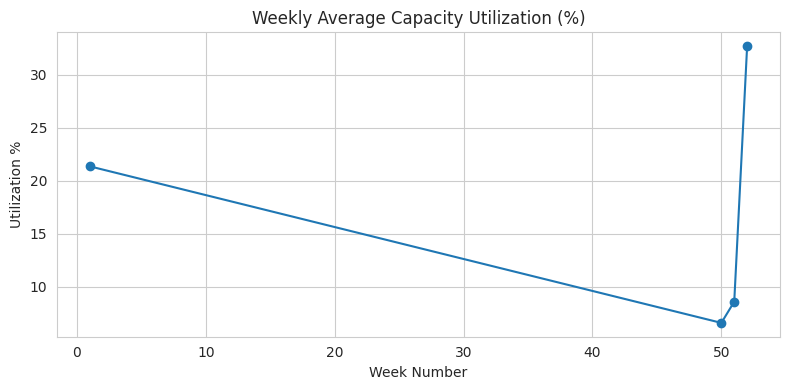

In [26]:
daily_forecast['Week'] = pd.to_datetime(daily_forecast['ds']).dt.isocalendar().week
weekly_trend = daily_forecast.groupby('Week')['Utilization %'].mean().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(weekly_trend['Week'], weekly_trend['Utilization %'], marker='o')
plt.title('Weekly Average Capacity Utilization (%)')
plt.xlabel('Week Number')
plt.ylabel('Utilization %')
plt.grid(True)
plt.tight_layout()
plt.show()


**Effect of SKU Switching / Variability**

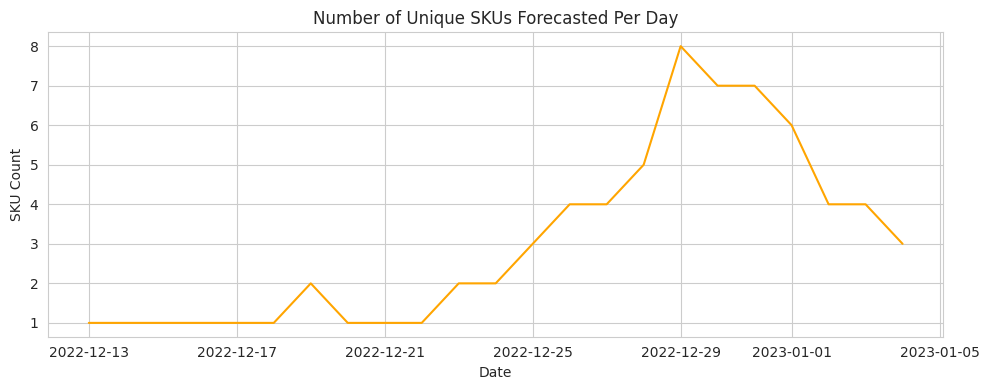

           ds  Unique SKUs
18 2022-12-31            7
19 2023-01-01            6
20 2023-01-02            4
21 2023-01-03            4
22 2023-01-04            3


In [27]:
sku_per_day = forecast_df.groupby('ds')['Product Name'].nunique().reset_index(name='Unique SKUs')

plt.figure(figsize=(10, 4))
plt.plot(sku_per_day['ds'], sku_per_day['Unique SKUs'], color='orange')
plt.title('Number of Unique SKUs Forecasted Per Day')
plt.xlabel('Date')
plt.ylabel('SKU Count')
plt.grid(True)
plt.tight_layout()
plt.show()

print(sku_per_day.tail())


**Synthetic Downtime & Inefficient Scheduling Simulation**

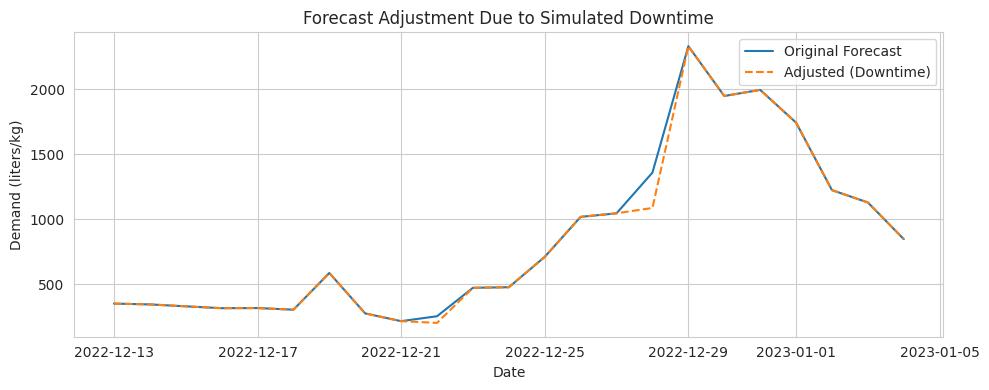

In [28]:
import numpy as np

np.random.seed(42)
downtime_days = np.random.choice(daily_forecast['ds'], size=int(0.1 * len(daily_forecast)), replace=False)
daily_forecast['Downtime Flag'] = daily_forecast['ds'].isin(downtime_days).astype(int)
daily_forecast['Adjusted Demand'] = daily_forecast.apply(lambda row: row['yhat'] * 0.8 if row['Downtime Flag'] else row['yhat'], axis=1)

plt.figure(figsize=(10, 4))
plt.plot(daily_forecast['ds'], daily_forecast['yhat'], label='Original Forecast')
plt.plot(daily_forecast['ds'], daily_forecast['Adjusted Demand'], label='Adjusted (Downtime)', linestyle='--')
plt.title('Forecast Adjustment Due to Simulated Downtime')
plt.xlabel('Date')
plt.ylabel('Demand (liters/kg)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Utilization Summary KPIs**

In [29]:
avg_util = round(daily_forecast['Utilization %'].mean(), 2)
std_util = round(daily_forecast['Utilization %'].std(), 2)
max_util = round(daily_forecast['Utilization %'].max(), 2)
min_util = round(daily_forecast['Utilization %'].min(), 2)

print('Average Utilization %:', avg_util)
print('Standard Deviation:', std_util)
print('Maximum Utilization %:', max_util)
print('Minimum Utilization %:', min_util)


Average Utilization %: 17.07
Standard Deviation: 12.9
Maximum Utilization %: 46.65
Minimum Utilization %: 4.35


**Milk Supply Side Fluctuation Simulation**

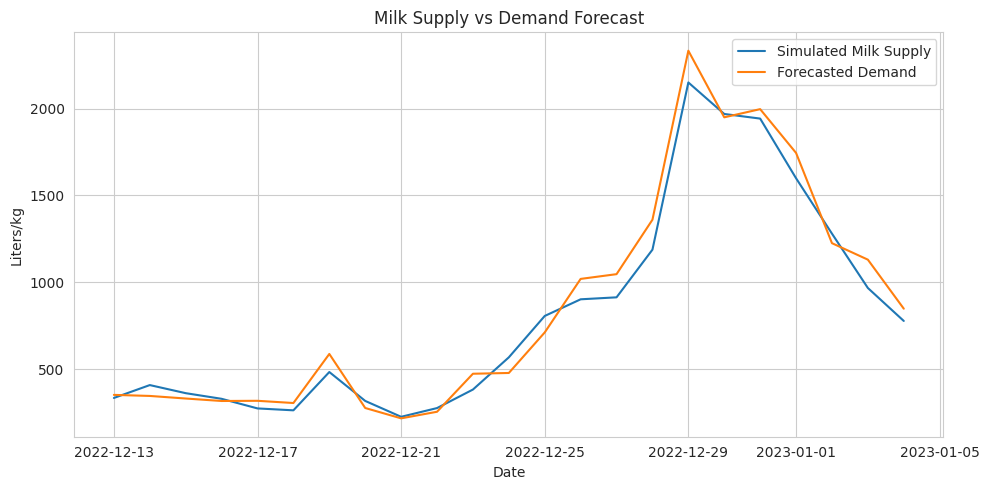

Supply Status
Shortage    13
Surplus     10
Name: count, dtype: int64


In [30]:
np.random.seed(42)
daily_forecast['Milk Supply (liters/kg)'] = daily_forecast['yhat'] * np.random.uniform(0.8, 1.2, size=len(daily_forecast))

daily_forecast['Supply Gap'] = daily_forecast['Milk Supply (liters/kg)'] - daily_forecast['yhat']
daily_forecast['Supply Status'] = daily_forecast['Supply Gap'].apply(lambda x: 'Surplus' if x >= 0 else 'Shortage')

plt.figure(figsize=(10, 5))
plt.plot(daily_forecast['ds'], daily_forecast['Milk Supply (liters/kg)'], label='Simulated Milk Supply')
plt.plot(daily_forecast['ds'], daily_forecast['yhat'], label='Forecasted Demand')
plt.title('Milk Supply vs Demand Forecast')
plt.xlabel('Date')
plt.ylabel('Liters/kg')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(daily_forecast['Supply Status'].value_counts())


**Cost-Efficiency and ROI Analysis**

/tmp/ipython-input-31-4290432346.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daily_forecast['Adjusted Demand'].fillna(daily_forecast['yhat'], inplace=True)


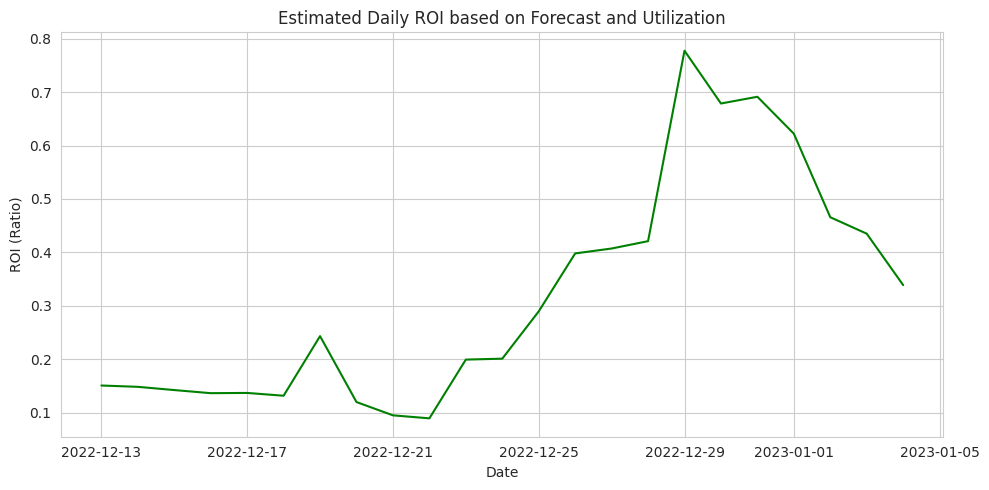

Average ROI: 0.32


In [31]:
daily_forecast['Adjusted Demand'].fillna(daily_forecast['yhat'], inplace=True)

avg_price = 45
fixed_cost = 100000
variable_cost_per_unit = 15

daily_forecast['Revenue'] = daily_forecast['Adjusted Demand'] * avg_price
daily_forecast['Production Cost'] = daily_forecast['Adjusted Demand'] * variable_cost_per_unit + fixed_cost
daily_forecast['ROI'] = daily_forecast['Revenue'] / daily_forecast['Production Cost']

plt.figure(figsize=(10, 5))
plt.plot(daily_forecast['ds'], daily_forecast['ROI'], color='green')
plt.title('Estimated Daily ROI based on Forecast and Utilization')
plt.xlabel('Date')
plt.ylabel('ROI (Ratio)')
plt.grid(True)
plt.tight_layout()
plt.show()

print('Average ROI:', round(daily_forecast["ROI"].mean(), 2))


**Quantifying SKU Switching Cost**

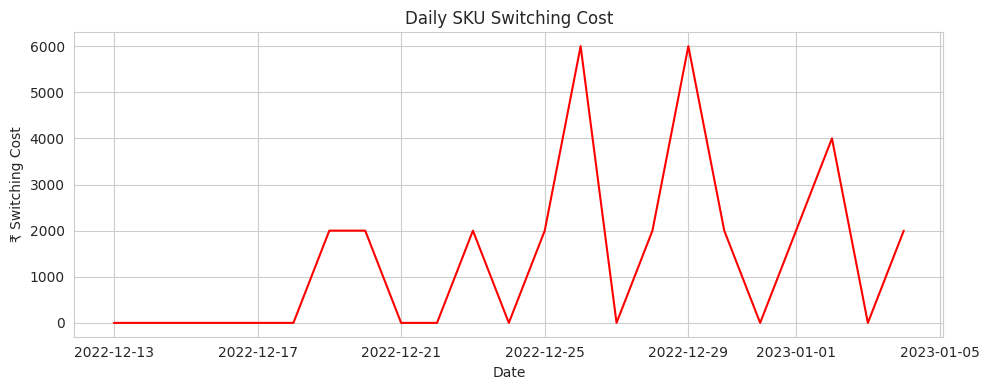

Average Switching Cost: 1391.3


In [32]:
sku_switch_df = forecast_df[['ds', 'Product Name']].drop_duplicates().sort_values(['ds', 'Product Name'])
sku_count = sku_switch_df.groupby('ds')['Product Name'].apply(list).reset_index()

sku_count['Previous'] = sku_count['Product Name'].shift(1)
sku_count['Switches'] = sku_count.apply(lambda row: len(set(row['Product Name']) ^ set(row['Previous'])) if row['Previous'] is not None else 0, axis=1)
sku_count['Switching Cost'] = sku_count['Switches'] * 2000

plt.figure(figsize=(10, 4))
plt.plot(sku_count['ds'], sku_count['Switching Cost'], color='red')
plt.title('Daily SKU Switching Cost')
plt.xlabel('Date')
plt.ylabel('₹ Switching Cost')
plt.grid(True)
plt.tight_layout()
plt.show()

print('Average Switching Cost:', round(sku_count['Switching Cost'].mean(), 2))


# Anomaly detaction



**Anomaly Detection in Forecasted Demand using Rolling Median and MAD**


*This section detects sudden spikes or drops in forecasted demand by computing a rolling median and Median Absolute Deviation (MAD). Data points with MAD-based Z-scores above a defined threshold are flagged as anomalies — categorized as "High Spike" or "Low Dip".*

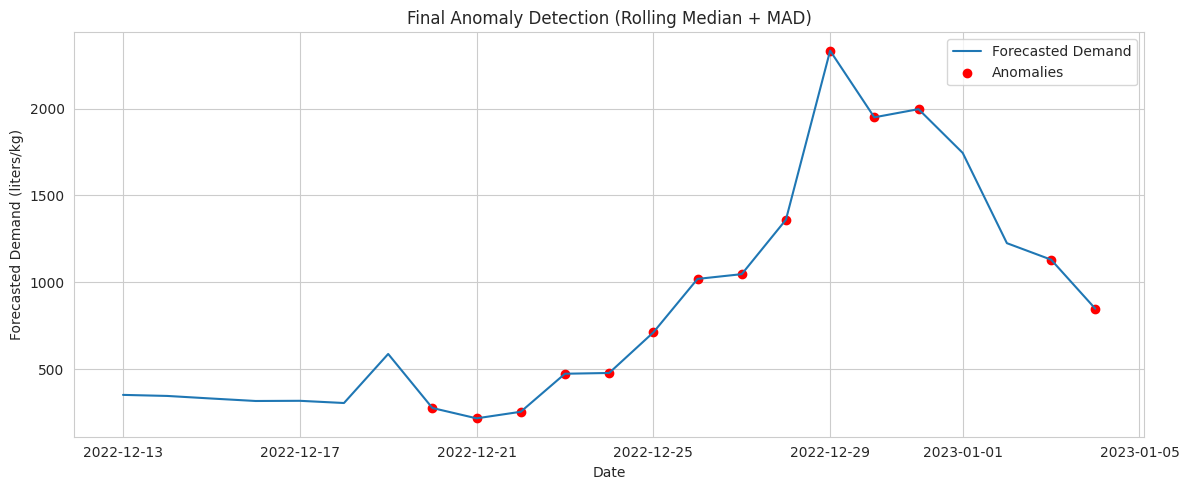

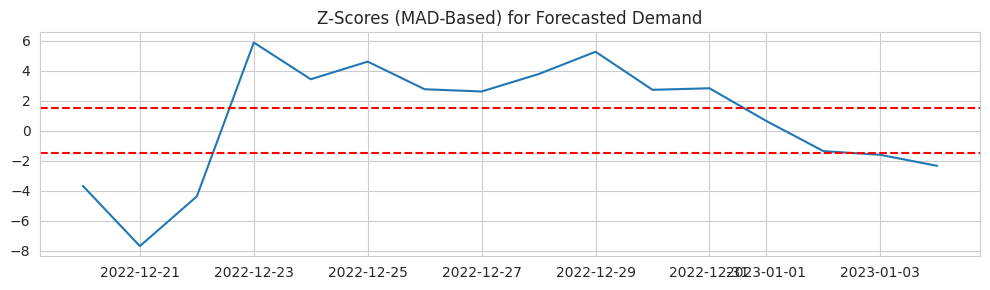

Anomaly Type
Normal        9
High Spike    9
Low Dip       5
Name: count, dtype: int64
           ds         yhat  MAD Z-Score Anomaly Type
7  2022-12-20   277.200285    -3.670348      Low Dip
8  2022-12-21   217.681518    -7.673744      Low Dip
9  2022-12-22   255.516050    -4.362185      Low Dip
10 2022-12-23   474.283975     5.879322   High Spike
11 2022-12-24   478.675878     3.433673   High Spike
12 2022-12-25   712.056187     4.607223   High Spike
13 2022-12-26  1019.882747     2.768361   High Spike
14 2022-12-27  1047.163143     2.618662   High Spike
15 2022-12-28  1360.387043     3.778002   High Spike
16 2022-12-29  2332.702518     5.264803   High Spike
17 2022-12-30  1949.496531     2.730109   High Spike
18 2022-12-31  1996.565022     2.833131   High Spike
21 2023-01-03  1130.608129    -1.597919      Low Dip
22 2023-01-04   848.541222    -2.331899      Low Dip


In [33]:
from scipy.stats import median_abs_deviation

z_threshold = 1.5
window = 7

rolling_median = []
rolling_mad = []
y = daily_forecast['yhat'].values

for i in range(len(y)):
    if i < window:
        rolling_median.append(np.nan)
        rolling_mad.append(np.nan)
    else:
        past_window = y[i-window:i]
        median_val = np.median(past_window)
        mad_val = median_abs_deviation(past_window)
        rolling_median.append(median_val)
        rolling_mad.append(mad_val if mad_val != 0 else 1)  # Avoid division by zero

daily_forecast['Rolling Median'] = rolling_median
daily_forecast['Rolling MAD'] = rolling_mad
daily_forecast['MAD Z-Score'] = (daily_forecast['yhat'] - daily_forecast['Rolling Median']) / daily_forecast['Rolling MAD']

daily_forecast['Anomaly Type'] = daily_forecast['MAD Z-Score'].apply(
    lambda z: 'High Spike' if z > z_threshold else ('Low Dip' if z < -z_threshold else 'Normal')
)

anomalies_mad = daily_forecast[daily_forecast['Anomaly Type'] != 'Normal']

plt.figure(figsize=(12, 5))
plt.plot(daily_forecast['ds'], daily_forecast['yhat'], label='Forecasted Demand')
plt.scatter(anomalies_mad['ds'], anomalies_mad['yhat'], color='red', label='Anomalies')
plt.title('Final Anomaly Detection (Rolling Median + MAD)')
plt.xlabel('Date')
plt.ylabel('Forecasted Demand (liters/kg)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(daily_forecast['ds'], daily_forecast['MAD Z-Score'], label='MAD Z-Score')
plt.axhline(y=z_threshold, color='r', linestyle='--')
plt.axhline(y=-z_threshold, color='r', linestyle='--')
plt.title('Z-Scores (MAD-Based) for Forecasted Demand')
plt.grid(True)
plt.tight_layout()
plt.show()

print(daily_forecast['Anomaly Type'].value_counts())
print(anomalies_mad[['ds', 'yhat', 'MAD Z-Score', 'Anomaly Type']])


# Inventory Reorder Alert System

**Inventory Stock Forecast and Reorder Alert System**

*This section compares the current stock levels with the 7-day forecasted demand for each product to identify potential stockouts. It generates reorder alerts, calculates reorder quantities, evaluates stock-out risk levels, and provides a proactive view of inventory health.*

In [34]:
latest_data = df.sort_values('Date').groupby('Product Name').tail(1)

forecast_next_7 = forecast_df.groupby(['Product Name']).tail(7).groupby('Product Name')['yhat'].sum().reset_index()
forecast_next_7.columns = ['Product Name', '7-Day Forecasted Demand']

reorder_df = pd.merge(latest_data, forecast_next_7, on='Product Name', how='inner')

reorder_df['Projected Stock After 7 Days'] = reorder_df['Quantity in Stock (liters/kg)'] - reorder_df['7-Day Forecasted Demand']

reorder_df['Reorder Alert'] = reorder_df.apply(
    lambda row: 'Reorder Now' if row['Projected Stock After 7 Days'] < row['Minimum Stock Threshold (liters/kg)'] else 'Sufficient',
    axis=1
)

reorder_df['Reorder Quantity (liters/kg)'] = reorder_df.apply(
    lambda row: row['Minimum Stock Threshold (liters/kg)'] - row['Projected Stock After 7 Days']
    if row['Reorder Alert'] == 'Reorder Now' else 0,
    axis=1
)

def risk_level(row):
    if row['Projected Stock After 7 Days'] < 0:
        return 'High'
    elif row['Projected Stock After 7 Days'] < row['Minimum Stock Threshold (liters/kg)']:
        return 'Medium'
    else:
        return 'Low'

reorder_df['Stock-Out Risk Level'] = reorder_df.apply(risk_level, axis=1)

reorder_df['Daily Forecast'] = reorder_df['7-Day Forecasted Demand'] / 7
reorder_df['Days Until Stockout'] = reorder_df['Quantity in Stock (liters/kg)'] / reorder_df['Daily Forecast']
reorder_df['Safety Buffer Remaining'] = reorder_df['Projected Stock After 7 Days'] - reorder_df['Minimum Stock Threshold (liters/kg)']

alert_table = reorder_df[['Product Name', 'Quantity in Stock (liters/kg)', '7-Day Forecasted Demand',
                          'Minimum Stock Threshold (liters/kg)', 'Projected Stock After 7 Days',
                          'Reorder Quantity (liters/kg)', 'Reorder Alert', 'Stock-Out Risk Level']]

print(alert_table)


  Product Name  Quantity in Stock (liters/kg)  7-Day Forecasted Demand  \
0        Lassi                            338              2322.901961   
1       Yogurt                            464              1563.039107   
2    Ice Cream                            431              1816.624413   
3   Buttermilk                            664              1829.847225   
4       Paneer                             21              1449.545445   
5       Cheese                            228              2239.410839   
6         Curd                            439              2193.237726   
7         Milk                            343              2182.510554   
8       Butter                            741              1785.317527   
9         Ghee                             90              2249.405305   

   Minimum Stock Threshold (liters/kg)  Projected Stock After 7 Days  \
0                                48.83                  -1984.901961   
1                                75.40   

**Stock vs Forecast**

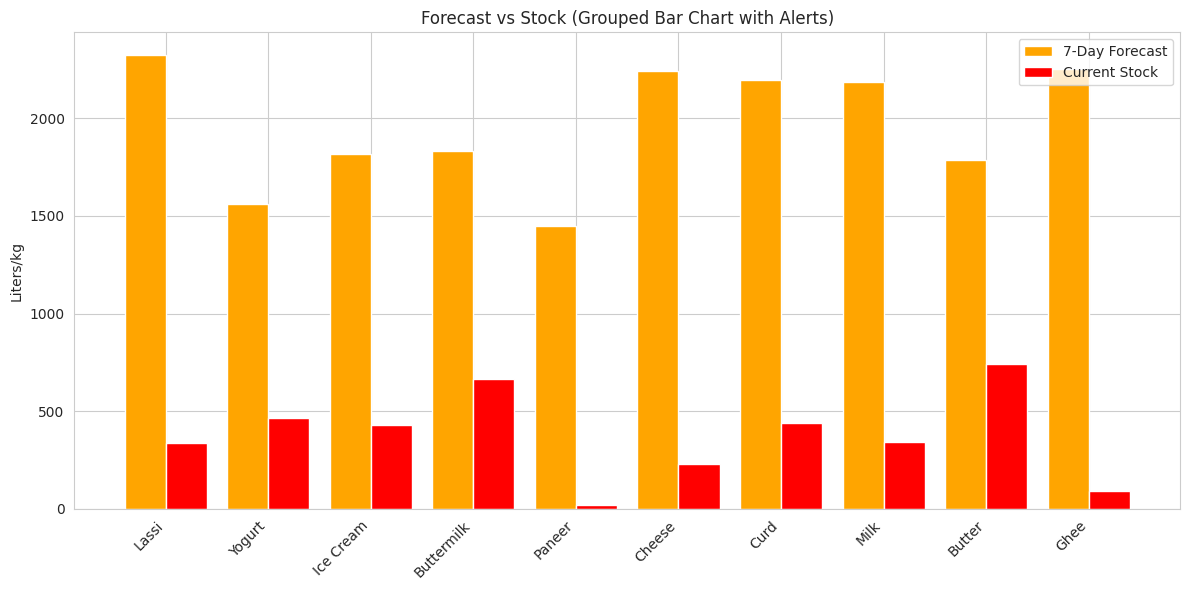

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
x = range(len(reorder_df))
colors = ['red' if alert == 'Reorder Now' else 'green' for alert in reorder_df['Reorder Alert']]

plt.bar(x, reorder_df['7-Day Forecasted Demand'], width=0.4, label='7-Day Forecast', color='orange', align='center')
plt.bar([i + 0.4 for i in x], reorder_df['Quantity in Stock (liters/kg)'], width=0.4, label='Current Stock', color=colors, align='center')

plt.xticks([i + 0.2 for i in x], reorder_df['Product Name'], rotation=45, ha='right')
plt.ylabel('Liters/kg')
plt.title('Forecast vs Stock (Grouped Bar Chart with Alerts)')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


**Reorder Alert Table**

In [36]:
def highlight_alert(row):
    if row['Reorder Alert'] == 'Reorder Now':
        return ['background-color: #f8d7da; color: #721c24'] * len(row)  # Light red
    elif row['Stock-Out Risk Level'] == 'High':
        return ['background-color: #fff3cd; color: #856404'] * len(row)  # Light orange
    else:
        return ['background-color: #d4edda; color: #155724'] * len(row)  # Light green


styled_table = reorder_df[['Product Name',
                           'Quantity in Stock (liters/kg)',
                           '7-Day Forecasted Demand',
                           'Minimum Stock Threshold (liters/kg)',
                           'Projected Stock After 7 Days',
                           'Reorder Quantity (liters/kg)',
                           'Days Until Stockout',
                           'Safety Buffer Remaining',
                           'Reorder Alert',
                           'Stock-Out Risk Level']].style.apply(highlight_alert, axis=1)

styled_table


,Product Name,Quantity in Stock (liters/kg),7-Day Forecasted Demand,Minimum Stock Threshold (liters/kg),Projected Stock After 7 Days,Reorder Quantity (liters/kg),Days Until Stockout,Safety Buffer Remaining,Reorder Alert,Stock-Out Risk Level
0,Lassi,338,2322.901961,48.830000,-1984.901961,2033.731961,1.018554,-2033.731961,Reorder Now,High
1,Yogurt,464,1563.039107,75.400000,-1099.039107,1174.439107,2.078003,-1174.439107,Reorder Now,High
2,Ice Cream,431,1816.624413,76.150000,-1385.624413,1461.774413,1.660773,-1461.774413,Reorder Now,High
3,Buttermilk,664,1829.847225,73.390000,-1165.847225,1239.237225,2.540103,-1239.237225,Reorder Now,High
4,Paneer,21,1449.545445,71.000000,-1428.545445,1499.545445,0.101411,-1499.545445,Reorder Now,High
5,Cheese,228,2239.410839,12.610000,-2011.410839,2024.020839,0.712687,-2024.020839,Reorder Now,High
6,Curd,439,2193.237726,57.390000,-1754.237726,1811.627726,1.401125,-1811.627726,Reorder Now,High
7,Milk,343,2182.510554,95.980000,-1839.510554,1935.490554,1.100109,-1935.490554,Reorder Now,High
8,Butter,741,1785.317527,98.970000,-1044.317527,1143.287527,2.905366,-1143.287527,Reorder Now,High
9,Ghee,90,2249.405305,29.430000,-2159.405305,2188.835305,0.280074,-2188.835305,Reorder Now,High
